In [1]:
# importing necessary libraries.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
# getting the data.
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# getting the basic information about the columns and their data-type.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
# checking for null values.
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
# checking for duplicates.
df.duplicated().value_counts()

False    1359
True      240
dtype: int64

In [6]:
# dropping the duplicate entries.
df=df.drop_duplicates()
df.shape

(1359, 12)

In [7]:
#resetting the index after deletion of some entries.
df.reset_index()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


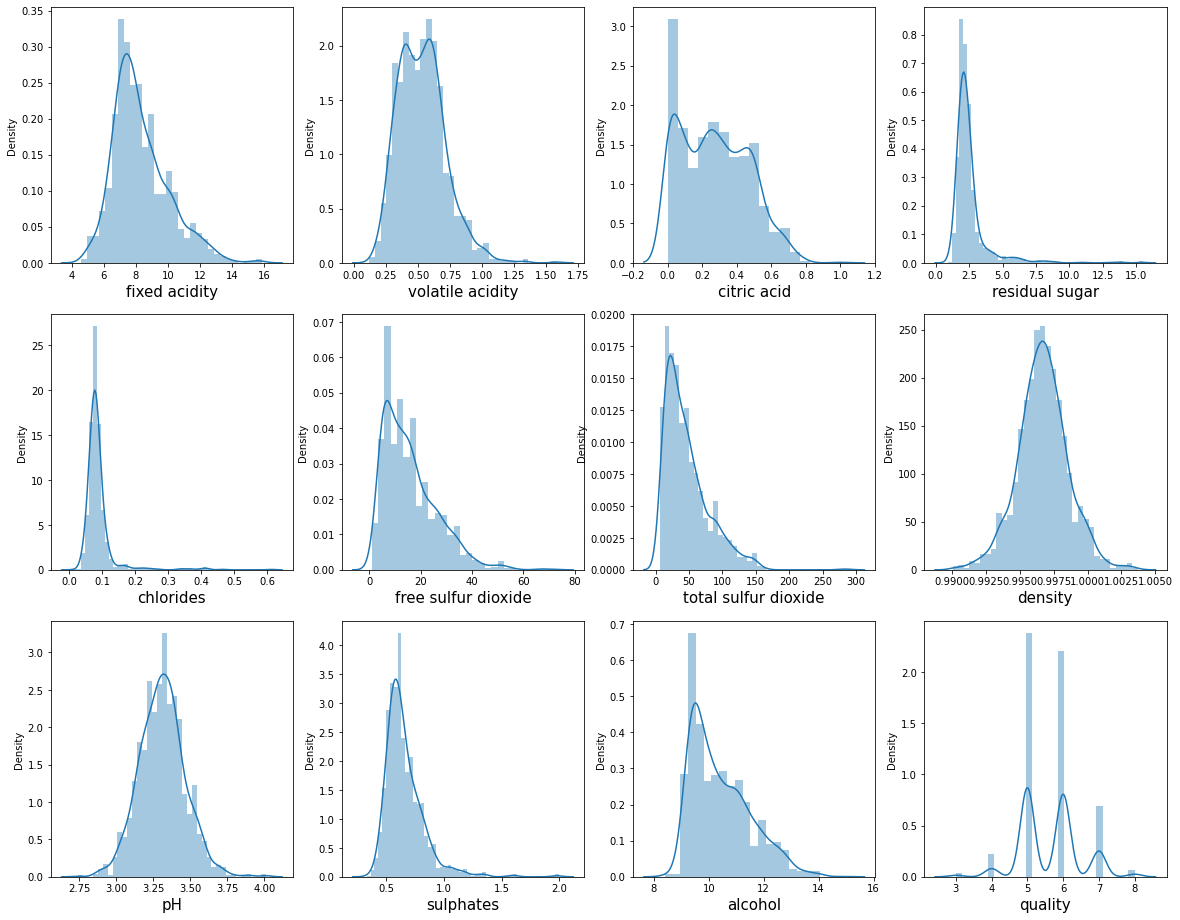

In [8]:
# Lets visualize the data distribution.
plt.figure(figsize=(20,16))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax= plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

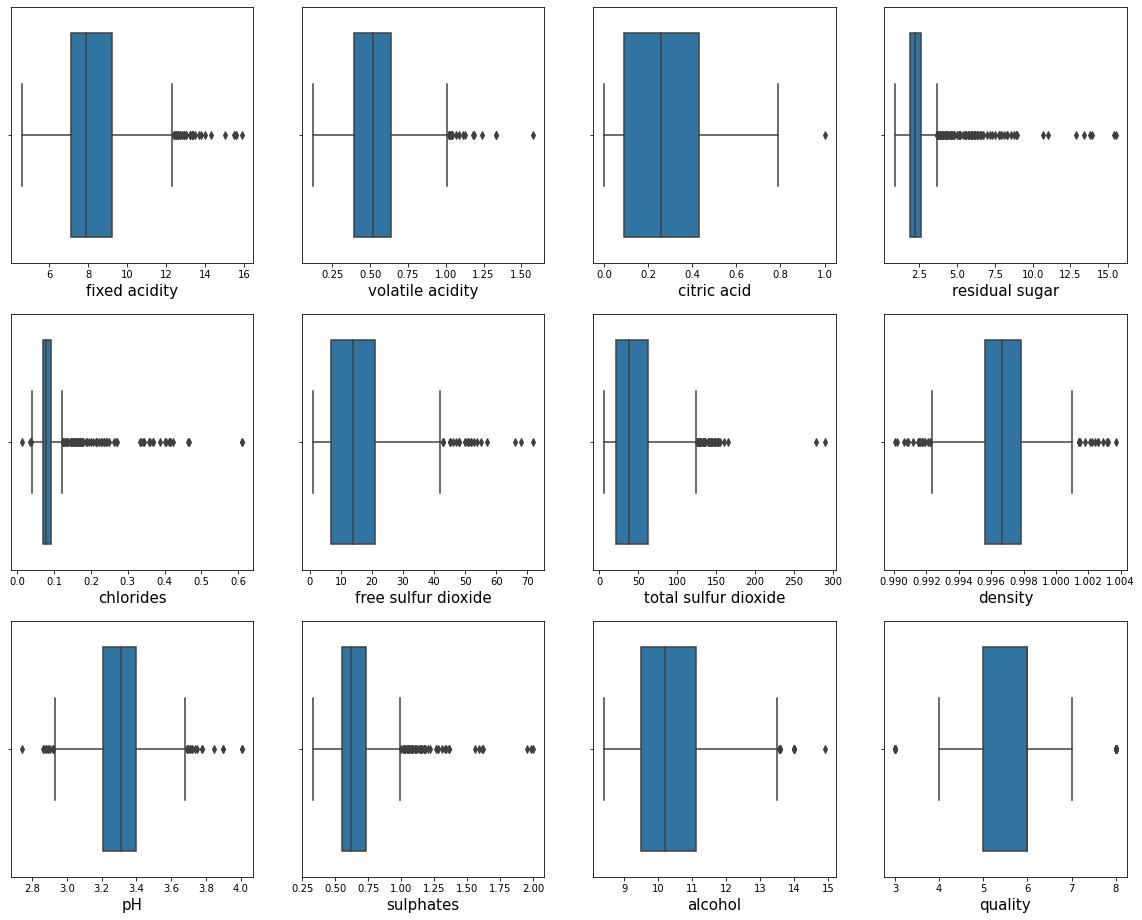

In [9]:
# checking the outliers using boxplot.
plt.figure(figsize=(20,16))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax= plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1359.0,8.310596,1.736990,4.60000,7.1000,7.9000,9.20000,15.90000
volatile acidity,1359.0,0.529478,0.183031,0.12000,0.3900,0.5200,0.64000,1.58000
citric acid,1359.0,0.272333,0.195537,0.00000,0.0900,0.2600,0.43000,1.00000
residual sugar,1359.0,2.523400,1.352314,0.90000,1.9000,2.2000,2.60000,15.50000
chlorides,1359.0,0.088124,0.049377,0.01200,0.0700,0.0790,0.09100,0.61100
free sulfur dioxide,1359.0,15.893304,10.447270,1.00000,7.0000,14.0000,21.00000,72.00000
total sulfur dioxide,1359.0,46.825975,33.408946,6.00000,22.0000,38.0000,63.00000,289.00000
density,1359.0,0.996709,0.001869,0.99007,0.9956,0.9967,0.99782,1.00369
pH,1359.0,3.309787,0.155036,2.74000,3.2100,3.3100,3.40000,4.01000
sulphates,1359.0,0.658705,0.170667,0.33000,0.5500,0.6200,0.73000,2.00000


In [11]:
# It can be seen that the data in many columns is skewed and there are lots of outliers.
# Lets remove the outliers first using iqr.

In [12]:
# removing outliers.

percentile25 = df['fixed acidity'].quantile(0.25)
percentile75 = df['fixed acidity'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['fixed acidity'] < upper_limit]
df = df[df['fixed acidity'] > lower_limit]

percentile25 = df['volatile acidity'].quantile(0.25)
percentile75 = df['volatile acidity'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['volatile acidity'] < upper_limit]
df = df[df['volatile acidity'] > lower_limit]

percentile25 = df['citric acid'].quantile(0.25)
percentile75 = df['citric acid'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['citric acid'] < upper_limit]
df = df[df['citric acid'] > lower_limit]

percentile25 = df['residual sugar'].quantile(0.25)
percentile75 = df['residual sugar'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['residual sugar'] < upper_limit]
df = df[df['residual sugar'] > lower_limit]

percentile25 = df['chlorides'].quantile(0.25)
percentile75 = df['chlorides'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['chlorides'] < upper_limit]
df = df[df['chlorides'] > lower_limit]

percentile25 = df['free sulfur dioxide'].quantile(0.25)
percentile75 = df['free sulfur dioxide'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['free sulfur dioxide'] < upper_limit]
df = df[df['free sulfur dioxide'] > lower_limit]

percentile25 = df['total sulfur dioxide'].quantile(0.25)
percentile75 = df['total sulfur dioxide'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['total sulfur dioxide'] < upper_limit]
df = df[df['total sulfur dioxide'] > lower_limit]

percentile25 = df['density'].quantile(0.25)
percentile75 = df['density'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['density'] < upper_limit]
df = df[df['density'] > lower_limit]

percentile25 = df['pH'].quantile(0.25)
percentile75 = df['pH'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['pH'] < upper_limit]
df = df[df['pH'] > lower_limit]

percentile25 = df['sulphates'].quantile(0.25)
percentile75 = df['sulphates'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['sulphates'] < upper_limit]
df = df[df['sulphates'] > lower_limit]

percentile25 = df['alcohol'].quantile(0.25)
percentile75 = df['alcohol'].quantile(0.75)
iqr= percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
df = df[df['alcohol'] < upper_limit]
df = df[df['alcohol'] > lower_limit]

df.shape

(985, 12)

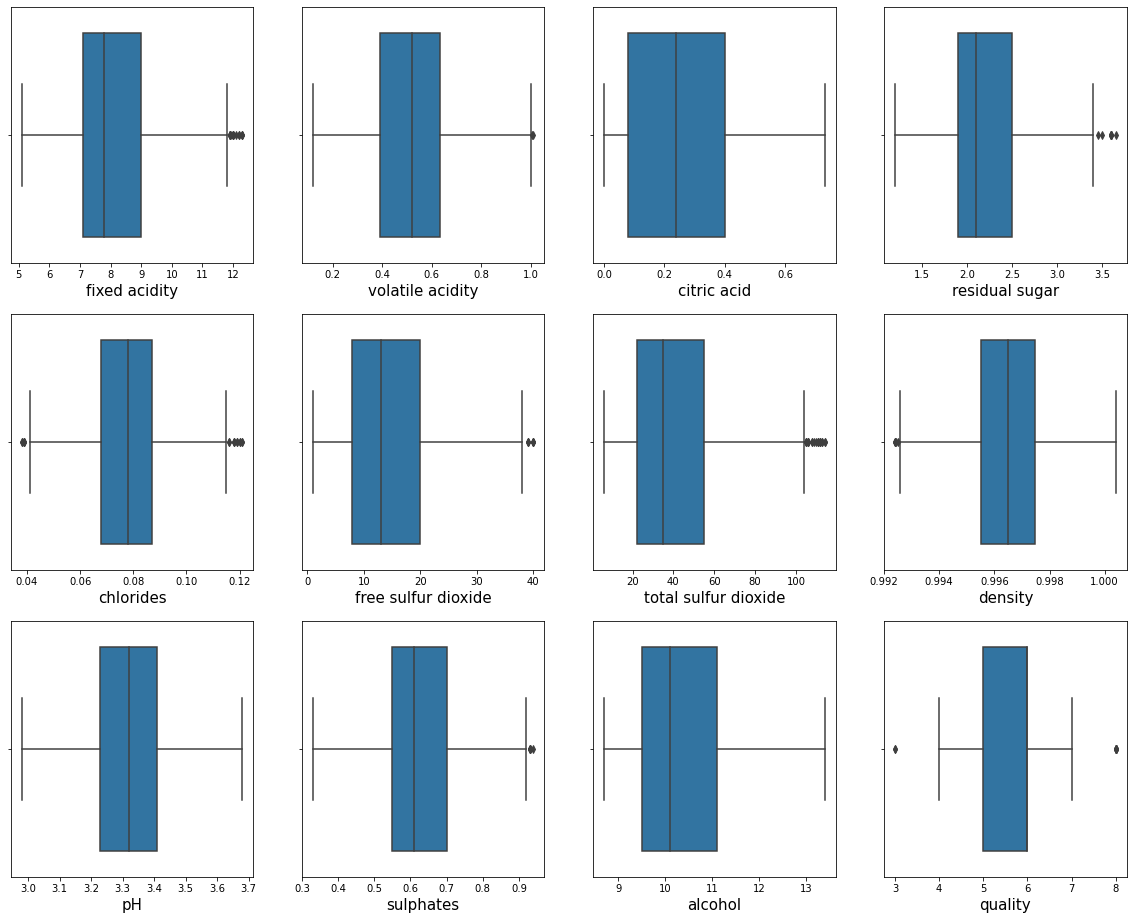

In [13]:
# Lets check the boxplot and data distribution now, after removal of outliers.
plt.figure(figsize=(20,16))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax= plt.subplot(3,4,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

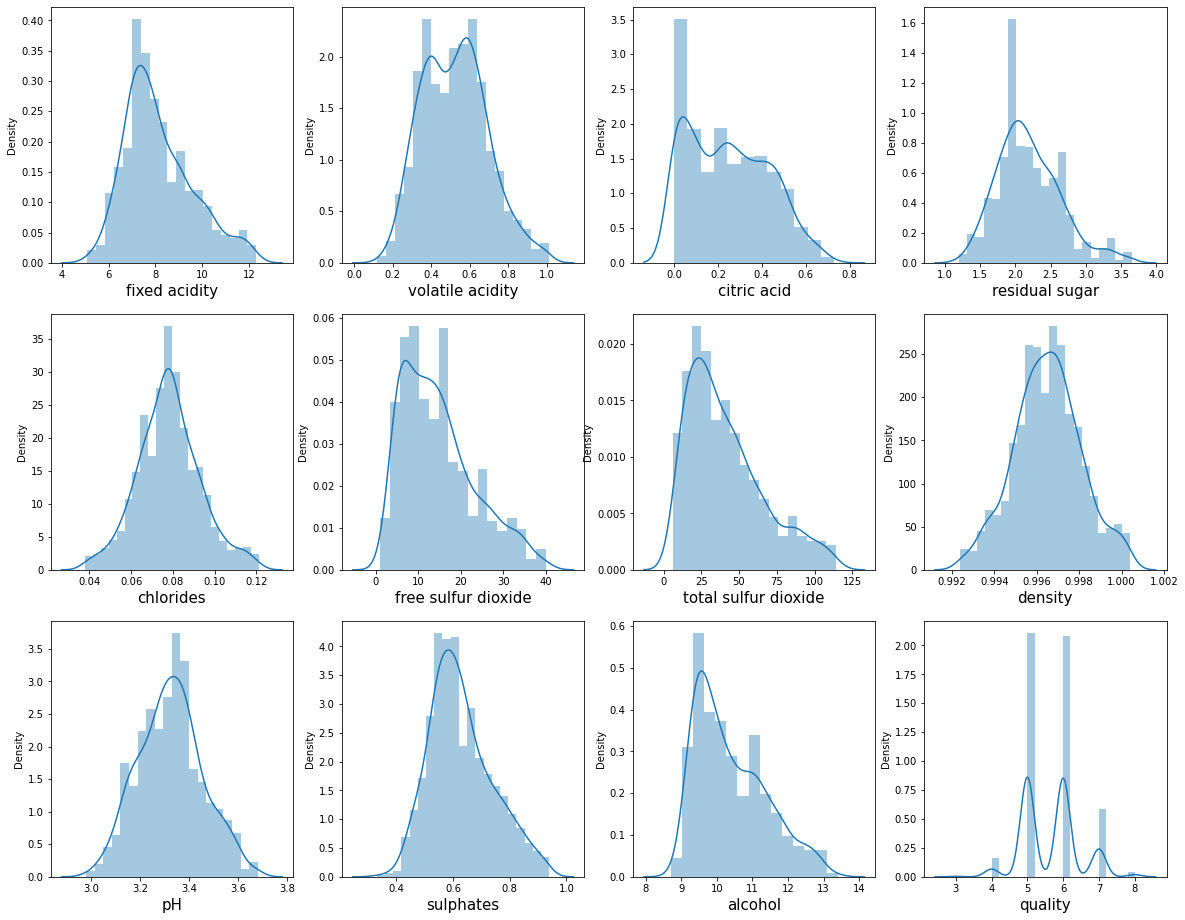

In [14]:
plt.figure(figsize=(20,16))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax= plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [15]:
# Lets check the skewness now.
df.skew()

fixed acidity           0.722042
volatile acidity        0.316022
citric acid             0.311817
residual sugar          0.628887
chlorides               0.176785
free sulfur dioxide     0.808687
total sulfur dioxide    0.919328
density                 0.035145
pH                      0.126049
sulphates               0.531930
alcohol                 0.739741
quality                 0.300053
dtype: float64

In [16]:
# It can be seen that some columns still have a problematic level of skewness in them.
# Let's apply log-transformation on them.

df["fixed acidity"]= np.log(df["fixed acidity"])
df["residual sugar"]= np.log(df["residual sugar"])
df["free sulfur dioxide"]= np.log(df["free sulfur dioxide"])
df["total sulfur dioxide"]= np.log(df["total sulfur dioxide"])
df["sulphates"]= np.log(df["sulphates"])
df["alcohol"]= np.log(df["alcohol"])

df.skew()

#It can be seen that the skewness have come down to an acceptable level.

fixed acidity           0.320491
volatile acidity        0.316022
citric acid             0.311817
residual sugar          0.047627
chlorides               0.176785
free sulfur dioxide    -0.317219
total sulfur dioxide   -0.230744
density                 0.035145
pH                      0.126049
sulphates               0.094586
alcohol                 0.587053
quality                 0.300053
dtype: float64

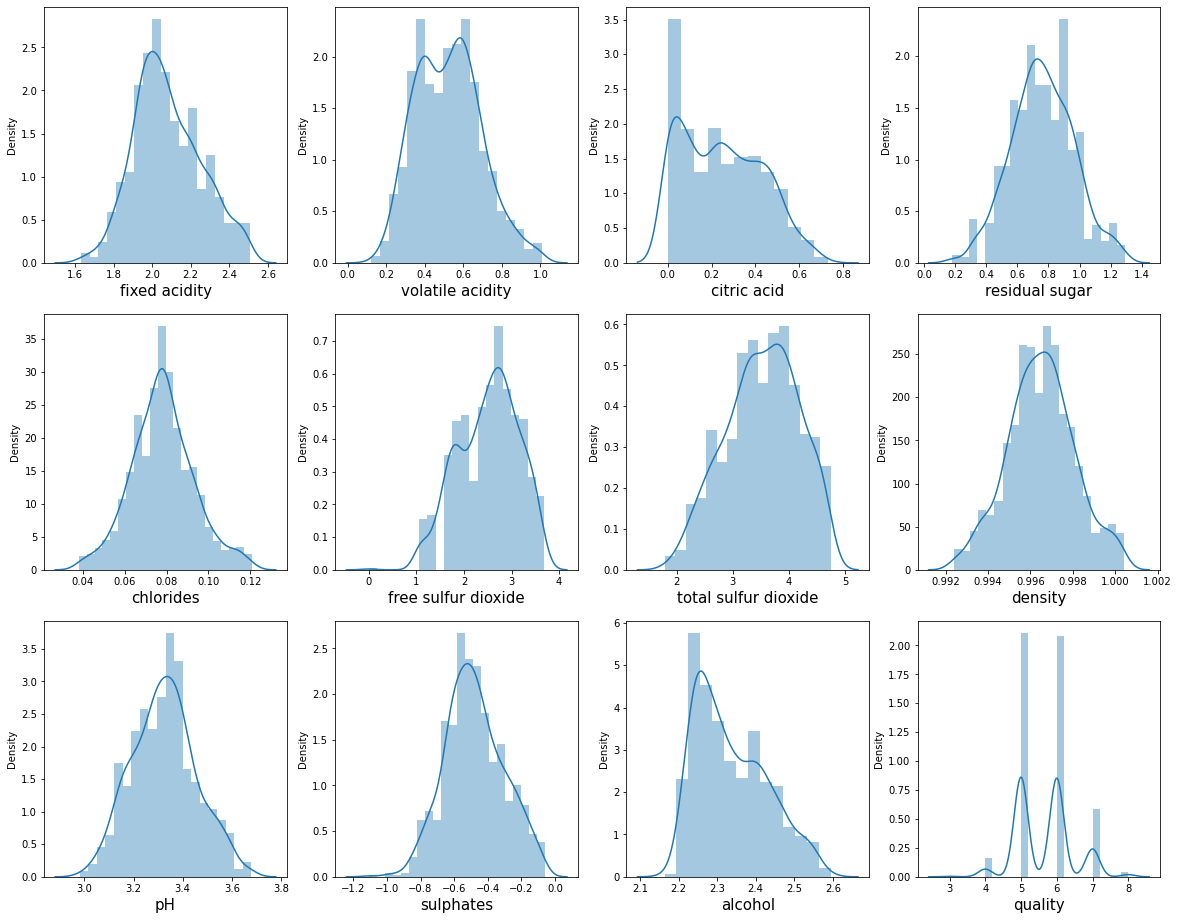

In [17]:
# Lets see the data distribution plot now.
plt.figure(figsize=(20,16))
plotnumber=1
for column in df:
    if plotnumber<=12:
        ax= plt.subplot(3,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

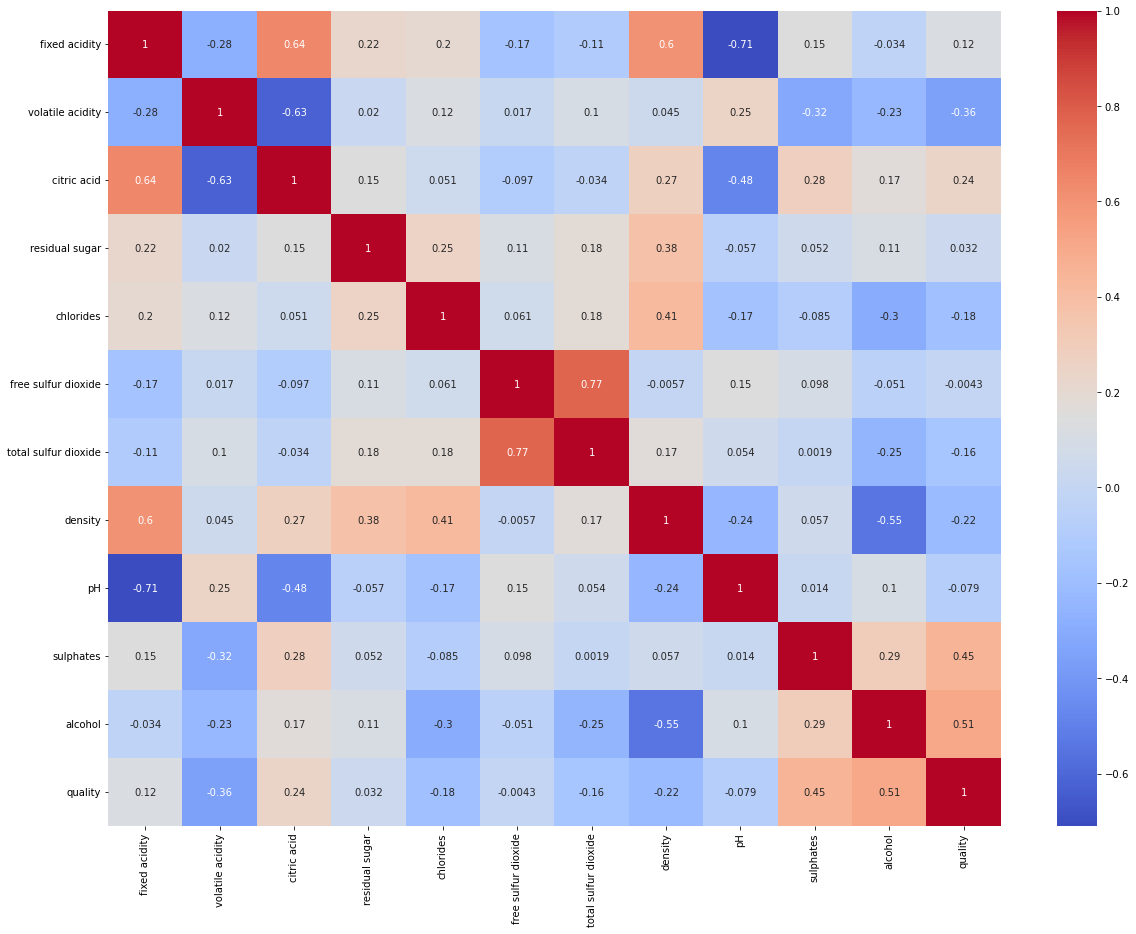

In [18]:
# Lets see the correlation heat-map.
corr= df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot= True, cmap="coolwarm")
plt.show()

In [19]:
df.corr().T

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.281447,0.643263,0.224051,0.199719,-0.167749,-0.107275,0.602151,-0.709918,0.147489,-0.034294,0.121570
volatile acidity,-0.281447,1.000000,-0.625634,0.019590,0.124037,0.016614,0.101200,0.044555,0.250983,-0.321540,-0.232091,-0.357357
citric acid,0.643263,-0.625634,1.000000,0.145448,0.051142,-0.096810,-0.034168,0.274774,-0.480568,0.278740,0.165799,0.243164
residual sugar,0.224051,0.019590,0.145448,1.000000,0.253035,0.105433,0.179061,0.378462,-0.056669,0.051934,0.108349,0.032334
chlorides,0.199719,0.124037,0.051142,0.253035,1.000000,0.061056,0.180933,0.413761,-0.174504,-0.085321,-0.300548,-0.184901
free sulfur dioxide,-0.167749,0.016614,-0.096810,0.105433,0.061056,1.000000,0.769353,-0.005683,0.149987,0.098123,-0.050987,-0.004301
total sulfur dioxide,-0.107275,0.101200,-0.034168,0.179061,0.180933,0.769353,1.000000,0.166170,0.053898,0.001866,-0.252710,-0.155383
density,0.602151,0.044555,0.274774,0.378462,0.413761,-0.005683,0.166170,1.000000,-0.238390,0.057475,-0.547669,-0.221486
pH,-0.709918,0.250983,-0.480568,-0.056669,-0.174504,0.149987,0.053898,-0.238390,1.000000,0.014031,0.103285,-0.078619
sulphates,0.147489,-0.321540,0.278740,0.051934,-0.085321,0.098123,0.001866,0.057475,0.014031,1.000000,0.293145,0.447134


In [20]:
# Lets check the correlation of our columns with the target variable.
correlation= df.corr()
np.abs(correlation["quality"])

fixed acidity           0.121570
volatile acidity        0.357357
citric acid             0.243164
residual sugar          0.032334
chlorides               0.184901
free sulfur dioxide     0.004301
total sulfur dioxide    0.155383
density                 0.221486
pH                      0.078619
sulphates               0.447134
alcohol                 0.509677
quality                 1.000000
Name: quality, dtype: float64

<AxesSubplot:xlabel='pH', ylabel='fixed acidity'>

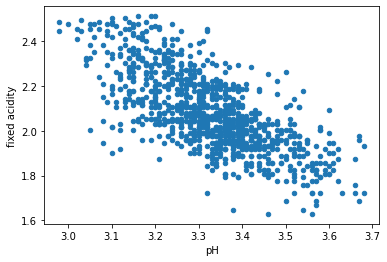

In [21]:
# scatter plot of "pH" vs "fixed acidity"
df.plot.scatter(x='pH',y='fixed acidity')

In [22]:
# Observations:
# It can be seen that "free sulfur dioxide" and "residual sugar" have a very weak relation with our target variable as both of 
# them have a values less than the acceptable alpha-level of 0.05.
# The "free sulfur dioxide" and "total sulfur dioxide" column might have a multicollinearity problem.
# "pH" also have a very weak relation with our target variable plus it might have a multicollinearity problem with "fixed acidity"
# Hence lets drop the "free sulfur dioxide","residual sugar" and "pH" columns. 

In [23]:
# Separating the features and label and dropping the decided features.
X= df.drop(columns=["quality","free sulfur dioxide","residual sugar","pH"])
y= df["quality"]

In [24]:
# scaling the data using standard scaler.
scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

In [25]:
# checking the variance-inflation-factor among our features.
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"]=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"]= X.columns
print(vif)

        vif              Features
0  2.978963         fixed acidity
1  1.902565      volatile acidity
2  2.805018           citric acid
3  1.251323             chlorides
4  1.155114  total sulfur dioxide
5  3.314331               density
6  1.300709             sulphates
7  2.118085               alcohol


In [26]:
############################################## LOGISTIC REGRESSION #############################################################

from sklearn.linear_model import LogisticRegression
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)

    lr= LogisticRegression()
    lr.fit(x_train, y_train)

    y_pred_train = lr.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= lr.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 61.11
Testing Score for sample 0 : 59.92


Training Score for sample 1 : 61.52
Testing Score for sample 1 : 61.54


Training Score for sample 2 : 60.3
Testing Score for sample 2 : 67.21


Training Score for sample 3 : 61.11
Testing Score for sample 3 : 59.51


Training Score for sample 4 : 62.47
Testing Score for sample 4 : 58.7


Training Score for sample 5 : 63.01
Testing Score for sample 5 : 57.09


Training Score for sample 6 : 63.01
Testing Score for sample 6 : 59.51


Training Score for sample 7 : 61.92
Testing Score for sample 7 : 60.32


Training Score for sample 8 : 61.11
Testing Score for sample 8 : 61.54


Training Score for sample 9 : 62.6
Testing Score for sample 9 : 58.3




In [27]:
############################################## RANDOM FOREST CLASSIFIER ########################################################

from sklearn.ensemble import RandomForestClassifier
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)

    clf= RandomForestClassifier()
    clf.fit(x_train, y_train)

    y_pred_train = clf.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= clf.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")
    

Training Score for sample 0 : 100.0
Testing Score for sample 0 : 57.09


Training Score for sample 1 : 100.0
Testing Score for sample 1 : 60.73


Training Score for sample 2 : 100.0
Testing Score for sample 2 : 61.94


Training Score for sample 3 : 100.0
Testing Score for sample 3 : 59.11


Training Score for sample 4 : 100.0
Testing Score for sample 4 : 60.73


Training Score for sample 5 : 100.0
Testing Score for sample 5 : 57.49


Training Score for sample 6 : 100.0
Testing Score for sample 6 : 60.73


Training Score for sample 7 : 100.0
Testing Score for sample 7 : 60.73


Training Score for sample 8 : 100.0
Testing Score for sample 8 : 59.11


Training Score for sample 9 : 100.0
Testing Score for sample 9 : 62.75




In [28]:
################################################## KNN CLASSIFIER ##############################################################

from sklearn.neighbors import KNeighborsClassifier
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)
    
    knn= KNeighborsClassifier()
    knn.fit(x_train, y_train)

    y_pred_train = knn.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= knn.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2))
    print("\n")

Training Score for sample 0 : 69.51
Testing Score for sample 0 : 57.49


Training Score for sample 1 : 69.65
Testing Score for sample 1 : 56.28


Training Score for sample 2 : 70.33
Testing Score for sample 2 : 54.66


Training Score for sample 3 : 70.19
Testing Score for sample 3 : 54.25


Training Score for sample 4 : 69.51
Testing Score for sample 4 : 56.28


Training Score for sample 5 : 71.95
Testing Score for sample 5 : 55.06


Training Score for sample 6 : 70.73
Testing Score for sample 6 : 54.25


Training Score for sample 7 : 70.46
Testing Score for sample 7 : 51.42


Training Score for sample 8 : 69.65
Testing Score for sample 8 : 53.04


Training Score for sample 9 : 68.16
Testing Score for sample 9 : 58.7




In [29]:
############################################## SUPPORT VECTOR MACHINE ##########################################################

from sklearn.svm import SVC
for i in range(0,10):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,stratify=y,random_state=i)
    
    svc= SVC()
    svc.fit(x_train, y_train)

    y_pred_train = svc.predict(x_train)
    accuracy_train = accuracy_score(y_train,y_pred_train)
    print("Training Score for sample",i,":",round(accuracy_train*100,2))

    y_pred= svc.predict(x_test)
    accuracy_test = accuracy_score(y_test,y_pred)
    print("Testing Score for sample",i,":",round(accuracy_test*100,2)) 
    print("\n")

Training Score for sample 0 : 67.48
Testing Score for sample 0 : 57.89


Training Score for sample 1 : 68.29
Testing Score for sample 1 : 60.32


Training Score for sample 2 : 66.12
Testing Score for sample 2 : 64.78


Training Score for sample 3 : 68.29
Testing Score for sample 3 : 58.3


Training Score for sample 4 : 67.62
Testing Score for sample 4 : 59.51


Training Score for sample 5 : 67.62
Testing Score for sample 5 : 56.68


Training Score for sample 6 : 67.48
Testing Score for sample 6 : 56.28


Training Score for sample 7 : 69.24
Testing Score for sample 7 : 56.28


Training Score for sample 8 : 67.21
Testing Score for sample 8 : 58.7


Training Score for sample 9 : 65.58
Testing Score for sample 9 : 59.51




In [30]:
# It can be seen that the Logistic Regression model is giving the best results when we compare the training and testing results.
# Random Forests model seems to be overfitting as there is huge difference between training and testing score.
# Hence lets check the cross-validation score and if the scores are found to be consistent then lets save the model.

In [32]:
#Hyperparameter tuning using GridSearchCV.

from sklearn.model_selection import GridSearchCV
LogisticRegression()
params= {"penalty": ['l1','l2','elasticnet'],
         "solver" : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
         "max_iter": [500,1000,2000,5000]}

grd= GridSearchCV(lr, param_grid=params,cv=5,n_jobs=-1)

grd.fit(x_train,y_train)
print(grd.best_params_)

{'max_iter': 500, 'penalty': 'l1', 'solver': 'saga'}


In [41]:
# Taking the best sample split result and applying on the tuned model.

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=1)

lr_grd =grd.best_estimator_
lr_grd.fit(x_train, y_train)
    
y_pred_train = lr_grd.predict(x_train)
accuracy_train = accuracy_score(y_train,y_pred_train)
print("Training Score:",round(accuracy_train*100,2))

y_pred= lr_grd.predict(x_test)
accuracy_test = accuracy_score(y_test,y_pred)
print("Testing Score:",round(accuracy_test*100,2)) 

Training Score: 61.52
Testing Score: 62.35


In [42]:
# Classification Report

print(classification_report(y_test,y_pred,digits=2))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.67      0.75      0.71       106
           6       0.60      0.63      0.61       102
           7       0.50      0.38      0.43        29
           8       0.00      0.00      0.00         4

    accuracy                           0.62       247
   macro avg       0.35      0.35      0.35       247
weighted avg       0.59      0.62      0.61       247



In [36]:
# cross-validating the Logistic Regression model.
from sklearn.model_selection import cross_val_score, KFold

for i in range(5,10):
    cv_score= cross_val_score(lr_grd,X_scaled,y,cv=i).mean()
    print("the cv score for",i,"fold:", round(cv_score*100,2))

the cv score for 5 fold: 60.0
the cv score for 6 fold: 59.3
the cv score for 7 fold: 60.41
the cv score for 8 fold: 60.11
the cv score for 9 fold: 59.2


In [37]:
# saving the model using pickle
import pickle 

Red_Wine= "Red_Wine_final_model.pickle"
pickle.dump(lr_grd, open(Red_Wine,'wb'))